# # The Zeta Function

As we saw previously with the free spectrum, putting systems of particles in a finite-volume introduces non-trival distortions to the spectrum. If we wish to better understand these finite-volume distortions we can start by studying $\mathbf{2}\to\mathbf{2}$ scattering in a box where for now we'll stick with the case of non-interacting particles for simplicity.

In [3]:
import itertools
import math as m
import numpy as np
from scipy import special as s #special.erfi
import matplotlib.pyplot as plt
import cmath as c
import time
from numpy.core.umath_tests import inner1d
from scipy import optimize

## Analytic Derivation

### Poisson Summation Formula

Most of the steps outlined here for the analytic derivation for those given by the C.H.Kim, C.T.Sachrajda, and S.R.Sharpe in their 2005 paper **[Arxiv:0507006](https://arxiv.org/pdf/hep-lat/0507006.pdf)**. The first formula we'll introduce here is the Poisson summation formula,

$$
\frac{1}{L^{3}}\sum_{\vec{k}} g(\vec{k})
=
\int \frac{d^{3}k}{(2\pi)^{3}}g(\vec{k})
+
\sum_{\vec{l} \ne \vec{0}}
\int \frac{d^{3}k}{(2\pi)^{3}}
e^{iL\vec{l}\cdot\vec{k}} g(\vec{k}),
$$

where on the left-hand-side $\vec{k}=(2\pi\vec{n})/L$ with integer values for the vector $\vec{n}=(n_{x},n_{y},n_{z})$ and on the right-hand-side we have the integer-valued vector $\vec{l}=(l_{x},l_{y},l_{z})$ where we exclude the zero-vector. For the kinds of functions $(g(\vec{k}))$ we'll be considering, their Fourier transforms $(g(\vec{r}))$ will be non-singular and decrease exponetially as $\vec{r}\to\infty$. Thus when we apply the Poisson summation formula we find the second term on the right-hand-side will decrease exponetially with the box size. Therefore as the box gets large, we find

$$
\frac{1}{L^{3}}\sum_{\vec{k}}g(\vec{k})
=
\int \frac{d^{3}k}{(2\pi)^{3}}g(\vec{k}),
$$

up to exponetially suppressed corrections.

### Finite-Volume corrections

We now consider $\mathbf{2}\to\mathbf{2}$ scattering in a general moving frame; however, for simplicity, we will only consider s-wave scattering for the time being. When considering these kinds of reactions in a finite-volume it turns out we will want summations of the form,

$$
S(x^{2})
=
\frac{1}{L^{3}}\sum_{\vec{k}}
\frac{\omega_{k}^{\star}}{\omega_{k}}
\frac{g(\vec{k}^{\star})}{x^{2}-k^{\star\,2}},
$$

where the factor $\omega_{k}=\sqrt{m^{2}+\vec{k}^{2}}$, $\omega_{k}^{\star}$ is its CM couterpart, and the factor $\omega_{k}^{\star}/\omega_{k}$ is the Jacobian that allows us to transform from the general moving to the CM frame. We also intrduced the relative momentum between the two particles in the CM frame which is related to the variable Mandelstam $s$ as,

$$
x^{2}
=
\frac{(s-(m_{1}+m_{2})^{2})(s-(m_{1}-m_{2})^{2})}{4s}
$$

We can now rewrite $\vec{k}^{\star}$ is spherical coordinates and expand $g(\vec{k}^{\star})$ in terms of spherical harmonics,

$$
g(\vec{k}^{\star})
=
\sum_{\ell=0}^{\infty}\sum_{m=-\ell}^{\ell}
g_{\ell m}(k^{\star})k^{\star\,\ell}\sqrt{4\pi}Y_{\ell m}(\theta^{\star},\phi^{\star}).
$$

Applying this along with the Poisson summation formula we find,

$$
\frac{1}{L^{3}}\sum_{\vec{k}}
\frac{\omega_{k}^{\star}}{\omega_{k}}
\frac{g_{\ell m}(k^{\star})-g_{\ell m}(x)e^{-\alpha(k^{\star\,2}-x^{2})}}{x^{2}-k^{\star\,2}}
k^{\star\,\ell}\sqrt{4\pi}Y_{\ell m}(\theta^{\star},\phi^{\star})
=
\int \frac{d^{3}k}{(2\pi)^{3}}
\frac{\omega_{k}^{\star}}{\omega_{k}}
\frac{g_{\ell m}(k^{\star})-g_{\ell m}(x)e^{-\alpha(k^{\star\,2}-x^{2})}}{x^{2}-k^{\star\,2}}
k^{\star\,\ell}\sqrt{4\pi}Y_{\ell m}(\theta^{\star},\phi^{\star}),
$$

where we must subtract a function $g(q^{\star})$ to cancel the pole at $x^{2}=k^{\star\,2}$ and we introduce the exponential to ensure that our subtraction does not introduce ultraviolet divergences. From this equation we see the summation we are interested in for s-wave scattering can be written as

$$
\frac{1}{L^{3}}\sum_{\vec{k}}
\frac{\omega_{k}^{\star}}{\omega_{k}}
\frac{g_{00}(\vec{k}^{\star})}{x^{2}-k^{\star\,2}}
=
\mathcal{P}
\int \frac{d^{3}k}{(2\pi)^{3}}
\frac{\omega_{k}^{\star}}{\omega_{k}}
\frac{g_{00}(\vec{k}^{\star})}{x^{2}-k^{\star\,2}}
+
g_{00}(x)Z^{d}(x^{2};\alpha),
$$

and we define the Zeta function to be 

$$
Z^{d}(x^{2};\alpha)
=
\left[\,\sum_{\vec{k}} 
- 
\int \frac{d^{3}k}{(2\pi)^{3}} \, \right] 
\frac{\omega_{k}^{\star}}{\omega_{k}} 
\frac{1}{k^{\star\,2} - x^2} e^{-\alpha(k^{\star\,2} - x^2)}.
$$

Finally, it can be shown that evaluating the integral present in the Zeta function **[Arxiv:1812.10504](https://arxiv.org/pdf/1812.10504.pdf)** , we get

$$
\int \frac{d^{3}k}{(2\pi)^{3}}
\frac{\omega_{k}^{\star}}{\omega_{k}} 
\frac{1}{k^{\star\,2} - x^2} e^{-\alpha(k^{\star\,2} - x^2)}
=
4\pi\left[
-\sqrt{\frac{\pi}{4\alpha}}e^{\alpha x^{2}}
+
\frac{\pi x}{2}\text{Erfi}\left( \sqrt{\alpha x^{2}} \right)
-
i\frac{\pi x}{2}
\right],
$$

where Erfi$(x)$ is the imaginary error function.

In [9]:
def mySqrt( z ):
   return 1j * c.sqrt( -z )

def dot(A, B):
   return np.dot(A,B)

def generateIntList( nShell ):
    intList = []
    rawList = np.array(np.arange(-nShell,nShell+1))
    for i in itertools.product(rawList,rawList,rawList):
        tmpList = np.array(i)
        if ( np.dot(tmpList,tmpList) <= nShell*nShell ):
            intList.append(tmpList)

    return np.asarray(intList)

def unit_vector( A ):
    if( all( A==0 ) ):
        return A
    else:
        return A / np.sqrt( np.dot(A,A) )

def multiply( A, B ):
   nA = len(A)
   return A.reshape(nA,1) * np.tile( B, (nA,1) )

def lorentzBoost( A0, A, beta ):
    gamma = 1.0 / np.sqrt( 1.0 - np.dot(beta,beta) )
    Apar  = multiply( A.dot( unit_vector(beta) ), unit_vector(beta) )
    Aper  = A - Apar
    A0_prime = gamma * ( A0 - A.dot( beta ) )
    A_prime  = gamma * ( Apar - multiply( A0, beta ) ) + Aper
    return A0_prime, A_prime

In [5]:
def cutoff( x_sq, n_sq, alpha ):
    return np.exp( -alpha * ( n_sq - x_sq ) )

def zetaFunction( x_sq, nP, alpha, n, m1_sq, m2_sq ):
    Ecm = np.sqrt( m1_sq + x_sq ) + np.sqrt( m2_sq + x_sq )
    beta = nP / np.sqrt( Ecm * Ecm + np.dot(nP,nP) )    

    # n = intList
    n0 = np.sqrt( m1_sq + inner1d(n,n) )
    n0_cm, n_cm = lorentzBoost( n0, n, beta )
    tmp = cutoff( x_sq, inner1d(n_cm,n_cm), alpha ) * n0_cm / n0 
    tmp = tmp / ( inner1d(n_cm,n_cm ) - x_sq ) 
    sum0 = np.sum( tmp )

    eps = 1.0e-16 * ( 1.0 - m.copysign(1, x_sq) )
    x   = c.sqrt( x_sq + 1j * eps )
    z   = c.sqrt( alpha * x_sq )
    integral = 4.0 * m.pi * ( ( m.sqrt( 0.25 * m.pi / alpha ) ) * m.exp( alpha * x_sq )
                              - 0.5 * m.pi * x * s.erfi( z ) )
        
    return sum0 - integral - 4.0 * m.pi * ( 0.5 * 1j * m.pi * x )

def x_sq( Ecm, m1, m2 ):
    return ( Ecm * Ecm - ( m1 + m2 )**2 ) * ( Ecm * Ecm - ( m1 - m2 )**2 ) / ( 4.0 * Ecm * Ecm )

<ipython-input-5-c11a030644fc>:12: RuntimeWarning: divide by zero encountered in true_divide
  tmp = tmp / ( inner1d(n_cm,n_cm ) - x_sq )


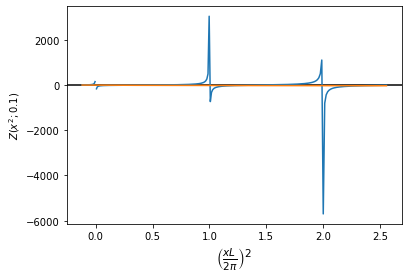

In [10]:
alpha = 0.1
nShell = 20

intList = generateIntList( nShell )

L = 5.0
m1 = L / ( 2.0 * np.pi )
m2 = L / ( 2.0 * np.pi )
nP = np.array([0,0,0])
m1_sq = m1**2
m2_sq = m2**2

Ecm_o_m_start = 1.8
Ecm_o_m_stop = 4.5
Ecm_o_m_step = 0.01

EcmRange = np.arange(Ecm_o_m_start, Ecm_o_m_stop, Ecm_o_m_step)
scale = []
zetaData_real = []
zetaData_imag = []
for Ecm in EcmRange:
    Ecm_m1 = Ecm*m1
    scale.append(x_sq(Ecm_m1,m1,m2))
    zeta = zetaFunction( x_sq(Ecm_m1,m1,m2), nP, alpha, intList, m1_sq, m2_sq)
    zetaData_real.append( zeta.real )
    zetaData_imag.append( zeta.imag )

plt.axhline(color="black")
plt.plot(scale, zetaData_real)
plt.plot(scale, zetaData_imag)
plt.xlabel(r'$\left(\frac{xL}{2\pi}\right)^{2}$',fontsize=15)
plt.ylabel(r'$Z(x^{2};0.1)$')
# plt.ylim(-0.1,0.5)
plt.show()

### Non-interacting Finite-volume Specturm

With the Zeta function we are able to characterize the finite-volume distortions that occur when analyzing two particles in a box. As it turns out, by itself the poles of this function describe the non-interacting, finite-volume spectrum we examined in the previous notebook. To see this can use the bisection method to find the roots of $Z^{-1}(x^{2};\alpha)$. Specifically, we want the points where both the real and imaginary parts of $Z^{-1}(x^{2};\alpha)$ are zero.

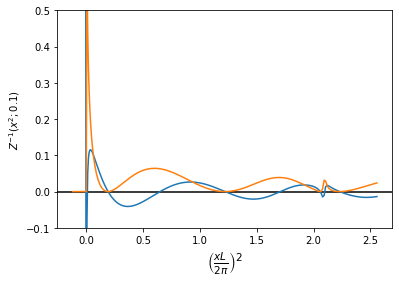

In [5]:
scale = []
zetaData_real = []
zetaData_imag = []
for Ecm in EcmRange:
    Ecm_m1 = Ecm*m1
    scale.append(x_sq(Ecm_m1,m1,m2))
    zeta = zetaFunction( x_sq(Ecm_m1,m1,m2), nP, alpha, intList, m1_sq, m2_sq)
    zetaInverse = 1/zeta
    zetaData_real.append( zetaInverse.real )
    zetaData_imag.append( zetaInverse.imag )

plt.axhline(color="black")
plt.plot(scale, zetaData_real)
plt.plot(scale, zetaData_imag)
plt.xlabel(r'$\left(\frac{xL}{2\pi}\right)^{2}$',fontsize=15)
plt.ylabel(r'$Z^{-1}(x^{2};0.1)$')
plt.ylim(-0.1,0.5)
plt.show()

In [6]:
def bisection(func, eMin, eMax, L, m1, m2, eps, args=()):
    qMinSq = x_sq(eMin*m1, m1, m2)#Em.floor(pow((qVal(eMin,m1,0)*L)/(2*m.pi),2))
    if qMinSq < 0:
        qMinSq = 0
    qMaxSq = x_sq(eMax*m1, m1, m2)#Em.ceil(pow((qVal(eMax,m1,0)*L)/(2*m.pi),2))
    qRangeSq = np.arange(qMinSq,qMaxSq+1,0.01)
    # print(qRangeSq)
    delta = 0.0001
    zeros = []

    for i,qsq in enumerate(qRangeSq):
        # if qsq == 0: continue
        if i+1 == len(qRangeSq):
            break

        qa = qsq #+ delta
        qb = qRangeSq[i+1] #- delta
        # if func(qa,*args)*func(qb,*args) > 0:
        #     continue
        mid = (qa+qb)/2
        while abs(func(mid,*args).real) > eps:
            func_a = func(qa,*args).real
            func_b = func(qb,*args).real
            func_mid = func(mid,*args).real

            if func_a*func_mid < 0:
                qb = mid
            elif func_mid*func_b < 0:
                qa = mid
            else:
                # print("Error!")
                break

            mid = (qa+qb)/2
        
        if abs(func(mid,*args).real) < eps and func(mid,*args).imag < eps:
            zeros.append(mid)

        # if len(zeros) == 6:
        #     break

    return zeros

def InvZeta( x_sq, nP, alpha, n, m1_sq, m2_sq ):
    return 1/zetaFunction(x_sq,nP,alpha,n,m1_sq,m2_sq)

def Ecm_sq( x_sq, m1_sq, m2_sq):
    return np.sqrt( np.add(x_sq,m1_sq)) + np.sqrt(np.add(x_sq,m2_sq))

In [7]:
roots = bisection(InvZeta,Ecm_o_m_start,Ecm_o_m_stop,L,m1,m2,0.000001,args=(nP, alpha, intList, m1_sq, m2_sq))

Ecm_roots = Ecm_sq(np.multiply(roots,pow(2*m.pi/L,2)),1,1)

print("x_sq roots: " + str(roots))
print("Ecm roots: " + str(Ecm_roots))

x_sq roots: [0.19186767578125002, 1.22029296875, 2.05880859375, 2.2299218749999996, 3.1091015625000002]
Ecm roots: [2.28296762 3.42170099 4.12365868 4.25269396 4.86197342]


In [8]:
twoPi = 2.0 * m.pi

def free_spectrum( m1_sq, m2_sq, n, nP ):
    energy1 = np.sqrt( m1_sq + np.inner(n,n) )
    energy2 = np.sqrt( m2_sq + np.inner(nP-n,nP-n) )
    return energy1 + energy2

def generate_free_spectrum( mL, mRatio, nP, EcmMax ):
    m1 = mL / twoPi
    m2 = m1 * mRatio
    m1_sq = m1**2
    m2_sq = m2**2
    nMax = 3
    Energies = []
    intList = np.array(np.arange(-nMax,nMax+1))
    for i in itertools.product(intList,intList,intList):
        n = np.array(i)
        En = free_spectrum(m1_sq, m2_sq, n, nP)
        Ecm = np.sqrt( En**2 - np.dot(nP,nP) )
        Ecm = 2.0 * m.pi * Ecm / mL
        Ecm = np.round( Ecm, 10 )
        if Ecm not in Energies:
            if Ecm < EcmMax:
                Energies.append(Ecm)
    Energies.sort()
    return Energies

def get_spectrum_data(nP,mRatio,EcmMax,LRange):
    data=[]
    maxLevel = 0
    for mL in LRange:
        Ecm = generate_free_spectrum( mL, mRatio, nP, EcmMax )
        if len(Ecm) > maxLevel:
            maxLevel = len(Ecm)
        data.append(Ecm)

    level = 0
    L_start = 0
    levelData = []
    returnData = []
    for _ in range(maxLevel):
        for i in data:
            if len(i) >= level+1:
                levelData.append(i[level])
            else:
                L_start += 1
        returnData.append([L_list[L_start:],levelData.copy()])
        level += 1
        L_start = 0
        levelData.clear()

    return returnData

In [1]:
nPList = [[0,0,0]]
Lmin = 2.0
Lmax = 8.0
Lstep = 0.1
L_list = np.arange(Lmin,Lmax,Lstep)
mRatio = 1.0
Ecm_o_m_Max = 5.0

fig = plt.figure(figsize=(7,5))

for i,nP in enumerate(nPList):
    tmp = get_spectrum_data(nP,mRatio,Ecm_o_m_Max,L_list)
    plot = fig.add_subplot(1,len(nPList),i+1)
    plot.set_title(str(nP))
    plot.set_xlabel("L")
    if i == 0:
        plot.set_ylabel(r'$E_{cm}$')
    for j in tmp:
        plot.plot(j[0],j[1],color="tab:blue")

for l in np.arange(Lmin,Lmax,1):
    roots = bisection(InvZeta,Ecm_o_m_start,Ecm_o_m_stop,l,l/(2*m.pi),l/(2*m.pi),0.000001,args=(nP, alpha, intList, (l/(2*m.pi))**2, (l/(2*m.pi))**2))
    Ecm_roots = Ecm_sq(np.multiply(roots,pow(2*m.pi/l,2)),1,1)
    # print(str(l) + ": " + str(roots) + ", " + str(Ecm_roots))
    plt.scatter([l]*len(Ecm_roots),Ecm_roots,color="red")

plt.ylim(1.9,5.5)

NameError: name 'np' is not defined